# Análise exploratória de dados (Python)

## Dicionario de dados

start_ts  - "data e hora de coleta"

weather_conditions  - "condições meteorológicas no momento em que a corrida começou"

duration_seconds  -  "duração da corrida em segundos"

## Importando as bibliotecas


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

## Carregando os dados

In [7]:
df_corridas = pd.read_csv("moved_project_sql_result_01.csv")
df_bairro = pd.read_csv("moved_project_sql_result_04.csv")
df_viagem = pd.read_csv("moved_project_sql_result_07.csv")


### Observação tipo de colunas das corridas

In [8]:
# (trips_amount) o número de corridas para cada empresa de táxi de 15 a 16 de novembro de 2017.
df_corridas.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


### Obsrvação tipo de colunas dos bairros

In [9]:
# (dropoff_location_name) bairros de Chicago onde as corridas terminaram
# (average_trips): o número médio de viagens que terminaram em cada bairro em novembro de 2017.

df_bairro.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


### Obsrvação tipo de colunas dos bairros Estatistica dos dados

In [10]:
df_bairro.describe()

#foi observado um numero muito discrepante o max	10727.466667


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


### Observação tipo de colunas das viagens

In [11]:
# (start_ts)  data e hora de coleta
# (weather_conditions) condições meteorológicas no momento em que a corrida começou
#(duration_seconds) duração da corrida em segundos

df_viagem.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


### Observação tipo de colunas das viagens Estatistica dos dados

In [12]:
df_viagem.describe()

#foi observado valor descrepante outlier max	7440.000000


,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


## Verificação tipos de dados

### Verificação tipo de dados dataset " corridas"

In [13]:

df_corridas['trips_amount'].astype

<bound method NDFrame.astype of 0     19558
1     11422
2     10367
3      9888
4      9299
      ...  
59        7
60        7
61        5
62        3
63        2
Name: trips_amount, Length: 64, dtype: int64>

### Verificação tipo de dados dataset " bairro"

In [14]:
df_bairro['average_trips'].astype


<bound method NDFrame.astype of 0     10727.466667
1      9523.666667
2      6664.666667
3      5163.666667
4      2546.900000
          ...     
89        3.137931
90        3.117647
91        2.333333
92        1.961538
93        1.800000
Name: average_trips, Length: 94, dtype: float64>

### Verificação tipo de dados dataset " bairro" estatistica dos dados

In [15]:
#estatistica dos dados
df_bairro.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


### Verificação tipo de dados dataset "duração corrida"


In [16]:
df_viagem['duration_seconds'].astype


<bound method NDFrame.astype of 0       2410.0
1       1920.0
2       1543.0
3       2512.0
4       1440.0
         ...  
1063       0.0
1064    1318.0
1065    2100.0
1066    1380.0
1067    2834.0
Name: duration_seconds, Length: 1068, dtype: float64>

### Verificação tipo de dados dataset "duração corrida" Estatistica dos dados

In [17]:
df_viagem.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


### identificar os 10 principais bairros em termos de destinos

In [18]:
df_bairro.head(10).sort_values(by='average_trips', ascending=False)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


### fazer gráficos: empresas de táxi e número de corridas, top 10 bairros por número de corridas em que esse bairro é destino

#### empresas de táxi e número de corridas

In [19]:
#observando os dados
df_corridas.head(10).sort_values(by='trips_amount', ascending=False)


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


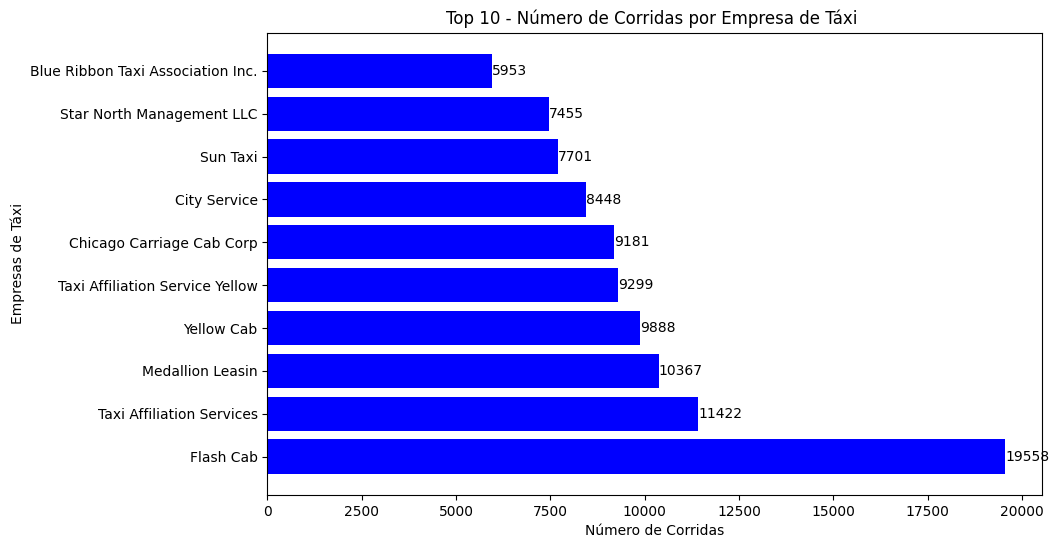

In [26]:
#criação dos grafico
df = pd.DataFrame(df_corridas)

top_10_corridas = df_corridas.nlargest(10, 'trips_amount').sort_values(by='trips_amount', ascending=False)

# Criando o gráfico de barras horizontais
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(top_10_corridas['company_name'], top_10_corridas['trips_amount'], color='Blue')

# Adicionando os valores nas barras
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width)}', va='center')

# Configurações do gráfico
plt.xlabel('Número de Corridas')
plt.ylabel('Empresas de Táxi')
plt.title('Top 10 - Número de Corridas por Empresa de Táxi ')

# Exibindo o gráfico
plt.show()


#### conclusões com base no gráfico empresas de taxi top 10

##### o grafico apreenta distribuição uniforme dos valores:
permite uma comparação clara do volume de corridas entre as empresas, destacando a “Flash Cab” como a mais ativa.

#### top 10 bairros por número de corridas em que esse bairro é destino

In [21]:
#observando os dados
df_bairro.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


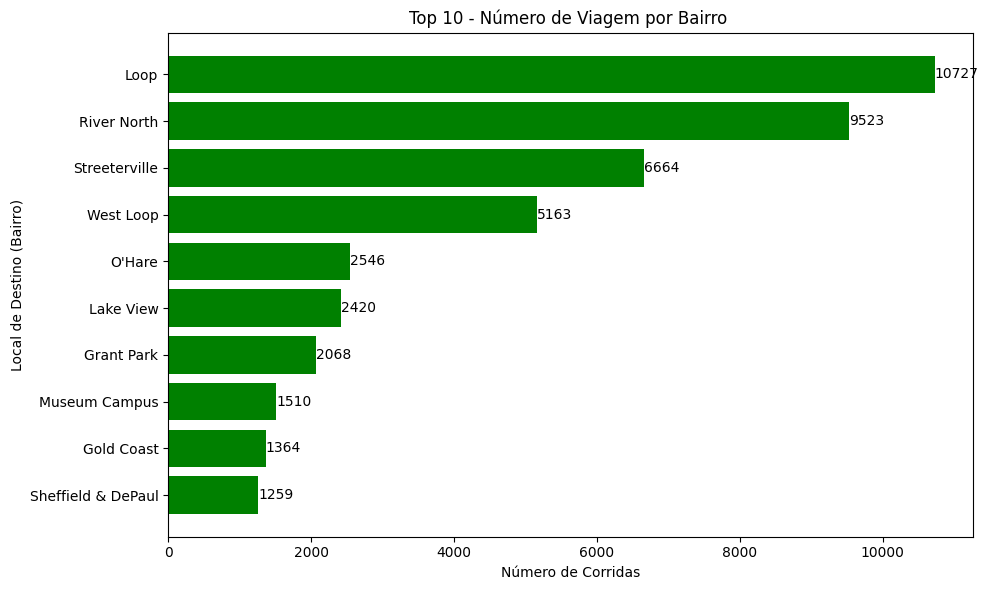

In [27]:

# Supondo que df_bairro já está definido com os dados e que 'trips_amount' é uma coluna numérica
df = pd.DataFrame(df_bairro)

# Selecionando os 10 bairros com maior número de corridas e ordenando de forma crescente
top_10_bairro = df.nlargest(10, 'average_trips').sort_values(by='average_trips', ascending=True)

# Criando o gráfico de barras horizontais
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(top_10_bairro['dropoff_location_name'], top_10_bairro['average_trips'], color='Green')

# Adicionando os valores nas barras
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width)}', va='center')

# Configurações do gráfico
plt.xlabel('Número de Corridas')
plt.ylabel('Local de Destino (Bairro)')
plt.title('Top 10 - Número de Viagem por Bairro ')

# Exibindo o gráfico
plt.tight_layout()
plt.show()



#### conclusões com base no gráfico numero de viagem top 10

#####  Aquantidade de viagem e bem distribuida:
porem a partir do bairro west loop começa a se destacr pelo numero de viagem ate o loop que tem o maior numero de viagem observado

## Testando hipóteses (Python)


### A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos

In [23]:
df_viagem

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [ ]:
# Converte a coluna 'start_ts' para datetime
df_viagem['data_formatada'] = pd.to_datetime(df_viagem['start_ts'], format='%Y-%m-%d')

# Extrai o dia da semana
df_viagem['dia_da_semana'] = df_viagem['data_formatada'].dt.day_name()

# Filtra os dados para incluir apenas os sábados com condições climáticas específicas
df_sabados = df_viagem[(df_viagem['dia_da_semana'] == 'Saturday') & (df_viagem['weather_conditions'].notnull())]

# Ordena os resultados pelas condições climáticas
df_sabados = df_sabados.sort_values(by='weather_conditions', ascending=True)







<div class="alert alert-danger">
<strong>Comentário do revisor v2</strong>

A avaliação da hipótese proposta ficou pendente.
</div>



<div class="alert alert-danger">
<strong>Comentário do revisor v3</strong>

O teste foi muito bem executado, Paulo, mas trata-se de uma boa prática sempre explicitar com clareza as hipóteses que estão sendo testadas e qual o p-valor obtido que levou a conclusão apresentada.
</div>



<div class="alert alert-success">
<strong>Comentário do revisor v4</strong>

Valeu pelo ajuste!
</div>

### Decida onde definir o nível de significância (alfa) por conta própria

#### nível de significância (alfa)  = 0.05

In [ ]:

# Filtrando os dados para sábados
df_sabados = df_viagem[df_viagem['dia_da_semana'] == 'Saturday']

# Separando os dados entre sábados chuvosos e não chuvosos
sabados_chuvosos = df_sabados[df_sabados['weather_conditions'] == 'Bad']['duration_seconds']
sabados_nao_chuvosos = df_sabados[df_sabados['weather_conditions'] == 'Good']['duration_seconds']

# Realizando o teste t para amostras independentes
t_stat, p_value = stats.ttest_ind(sabados_chuvosos, sabados_nao_chuvosos)

# Imprimindo o p-value
print(f"p-value: {p_value}")
print('\n')
# Verificando o resultado
alfa = 0.05
if p_value < alfa:
    print("Rejeitamos a hipótese nula. A duração média dos passeios muda nos sábados chuvosos.")

    
else:
    print("Não rejeitamos a hipótese nula. A duração média dos passeios não muda nos sábados chuvosos.")



#### como você formou as hipóteses nula e alternativa

##### O teste t calcula o p-valor para determinar a probabilidade de obter as amostras observadas assumindo que a hipótese nula é verdadeira.

Como o p-valor (6.517970327099473e-12) é menor que o nível de significância de 0.05, rejeitamos a hipótese nula. Isso sugere que o clima chuvoso afeta significativamente a duração média dos passeios.


#####  O critério usado para testar a hipótese foi:

O teste t de amostras independentes. Este teste foi escolhido porque estamos comparando as médias de dois grupos independentes (sábados chuvosos e não chuvosos) para determinar se há uma diferença significativa entre eles em termos da duração dos passeios.